In [4]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('housing.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [8]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [9]:
y = df['MEDV']
df.drop('MEDV', axis=1,inplace=True)

In [12]:
x = df
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [13]:
y

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print("shape of x_train",x_train.shape)
print('shape of x_test',x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (391, 3)
shape of x_test (98, 3)
shape of y_train (391,)
shape of y_test (98,)


In [16]:
regressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=0.1)
regressor

GradientBoostingRegressor(max_depth=2, n_estimators=3)

In [18]:
model = regressor.fit(x_train,y_train)

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_pred,y_test)
print("r2 score of the regressor:",r2_score)

r2 score of the regressor: -14.384035148386994


<BarContainer object of 3 artists>

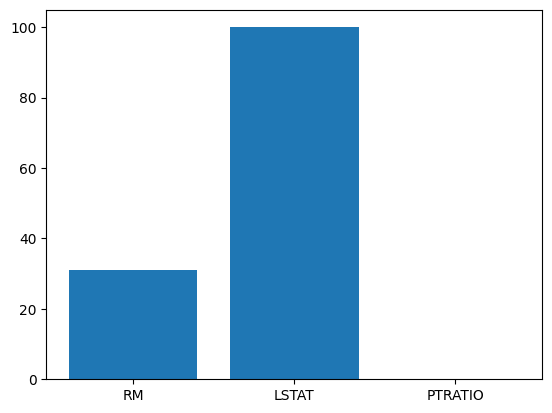

In [28]:
feature_name = df.columns
feature_name
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
feature_importance = 100.0*(feature_importance/feature_importance.max())
plt.bar(feature_name,feature_importance)


In [33]:
from sklearn.model_selection import GridSearchCV
lr = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,200,150,250]}
tuning = GridSearchCV(estimator= GradientBoostingRegressor(),param_grid=lr,scoring='r2')
tune_model = tuning.fit(x_train,y_train)
print("best parameter ",tune_model.best_params_)
print("best score:",tune_model.best_score_)

best parameter  {'learning_rate': 0.05, 'n_estimators': 150}
best score: 0.8375013899386872
